In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns

In [91]:
dataset = pd.read_csv("C:/Users/USER/Documents/car_prices2.csv", encoding='latin1')

In [21]:
dataset

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10109,2011,Infiniti,G Coupe,G37x,G Coupe,automatic,jn1cv6el3bm262629,tn,36.0,40769.0,black,black,nissan infiniti lt,20400,19700,Tue Dec 23 2014 10:30:00 GMT-0800 (PST)
10110,2011,Jeep,Grand Cherokee,Laredo,SUV,automatic,1j4rr4gg6bc510338,nj,35.0,94814.0,black,black,albert & jack inc,16350,16000,Wed Dec 31 2014 09:30:00 GMT-0800 (PST)
10111,2011,Infiniti,QX56,Base,SUV,automatic,jn8az2nf1b9503767,fl,29.0,39798.0,black,black,nissan infiniti lt,37700,31400,Thu Jan 15 2015 01:15:00 GMT-0800 (PST)
10112,2011,Infiniti,G Coupe,G37x,G Coupe,automatic,jn1cv6el4bm263370,tx,42.0,34639.0,white,black,nissan infiniti lt,21000,21750,Thu Dec 18 2014 11:00:00 GMT-0800 (PST)


In [28]:
column_sum = dataset['sellingprice'].sum()
num_rows = len(dataset)
average = column_sum/num_rows

print("mean: ", average)


mean:  14421.94690527981


In [84]:
sorted_dataset = dataset.sort_values(by='sellingprice', ascending=True)
selling_price_median =  dataset['sellingprice'].median()

print("median:" ,selling_price_median)

median: 12500.0


In [29]:
selling_price_mode =  dataset['sellingprice'].mode()

print("mode:" ,selling_price_mode)

mode: 0    15000
Name: sellingprice, dtype: int64


In [30]:
data_range = dataset['sellingprice'].max() - dataset['sellingprice'].min()

print("Range:", data_range)

Range: 153999


In [31]:
data_variance = dataset['sellingprice'].var()

print("Variance", data_variance)

Variance 124980695.04543541


In [74]:
selling_prices = dataset['sellingprice']

# the first quartile (Q1)
Q1 = selling_prices.quantile(0.25)
print("Q1 is:",Q1)

#third quartile (Q3)
Q3 = selling_prices.quantile(0.75)
print("Q3 IS ;", Q3)

#interquartile range (IQR)
IQR = Q3 - Q1

print("Interquartile Range (IQR):", IQR)

Q1 is: 6700.0
Q3 IS ; 19500.0
Interquartile Range (IQR): 12800.0


In [35]:
weighted_mean_selling_price = (dataset['selling_price'] *dataset['mmr']).sum() / dataset['mmr'].sum()

print("Weighted mean selling price:", weighted_mean_selling_price)

Weighted mean selling price: 22704.69351243059


In [75]:
standard_deviation =  dataset['sellingprice'].std()

print("standard deviation :", standard_deviation)

standard deviation : 11179.47651034857


In [52]:
stdofmean = 11179.47651034857 / 14421.94690527981 * 100
print(stdofmean)


77.5171104412804


Relative to the mean:
The standard deviation is approximately 77.5% of the mean. This suggests that the data points are relatively spread out from the mean, indicating a moderate to high variability in selling prices
 
Range of data: The range of 153999 is quite large compared to the mean. This indicates that there is a wide spread of selling prices in the dataset. Given this large range, a standard deviation of 11179.48 might be expected.


In [54]:
mean_selling_price = dataset['sellingprice'].mean()
std_deviation_selling_price = dataset['sellingprice'].std()
coefficient_of_variation = (std_deviation_selling_price / mean_selling_price) * 100

print("Coefficient of Variation:", coefficient_of_variation)

Coefficient of Variation: 77.5171104412804


In [58]:
covariance = dataset['sellingprice'].cov(dataset['mmr'])
print("Covariance between selling prices and MMR values:", covariance)

Covariance between selling prices and MMR values: 122184128.65861294


In [56]:
correlation_coefficient =  dataset['sellingprice'].corr(dataset['mmr'])
print("Correlation coefficient ", correlation_coefficient)

Correlation coefficient between selling prices and MMR values: 0.9789509525567889


The correlation value of 0.979 indicates a very strong positive correlation between the two variables. In other words, as selling prices increase, MMR values increasesproportionally.

In [59]:
#the 25th , 50th and  75th percentiles (Q1 ,Q2 and  Q3)
Q1 = dataset['sellingprice'].quantile(0.25)
Q2 = dataset['sellingprice'].quantile(0.5)
Q3 = dataset['sellingprice'].quantile(0.75)

print("25th percentile (Q1):", Q1)
print("50th percentile (Q2):", Q2)
print("75th percentile (Q3):", Q3)

25th percentile (Q1): 6700.0
50th percentile (Q2): 12500.0
75th percentile (Q3): 19500.0


In [61]:
minimum = dataset['sellingprice'].min()
Q1 = dataset['sellingprice'].quantile(0.25)
median = dataset['sellingprice'].median()
Q3 = dataset['sellingprice'].quantile(0.75)
maximum = dataset['sellingprice'].max()

print("Minimum:", minimum)
print("Q1 (25th percentile):", Q1)
print("Median (50th percentile):", median)
print("Q3 (75th percentile):", Q3)
print("Maximum:", maximum)

Minimum: 1
Q1 (25th percentile): 6700.0
Median (50th percentile): 12500.0
Q3 (75th percentile): 19500.0
Maximum: 154000


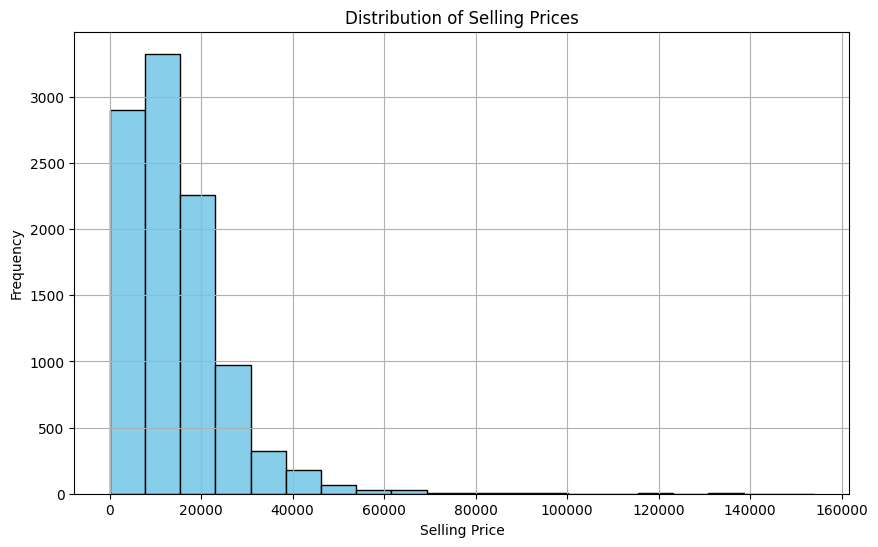

In [114]:
plt.figure(figsize=(10, 6))
plt.hist(dataset['sellingprice'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

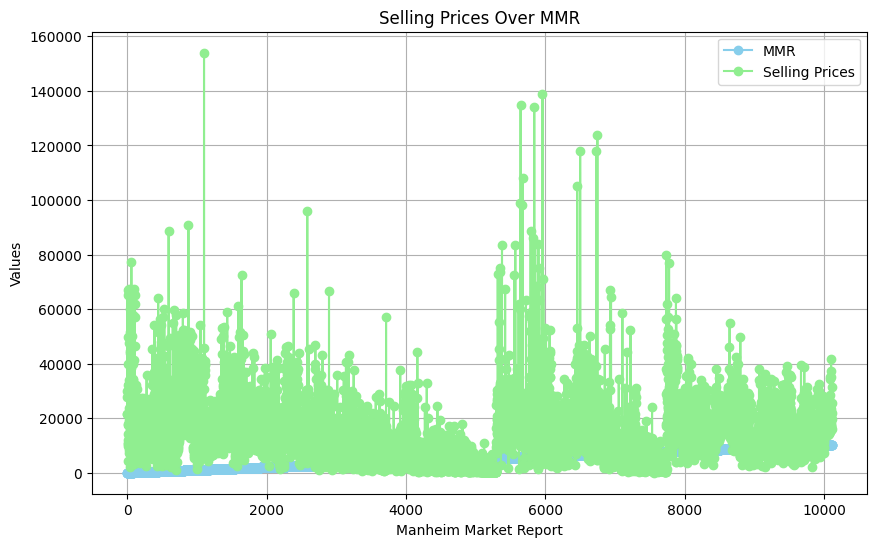

In [108]:
mmr = dataset['mmr'].index
selling_prices = dataset['sellingprice']

plt.figure(figsize=(10, 6))
plt.plot(mmr, color='skyblue', marker='o', linestyle='-', label='MMR')
plt.plot(selling_prices, color='lightgreen', marker='o', linestyle='-', label='Selling Prices')

plt.title('Selling Prices Over MMR')
plt.xlabel('Manheim Market Report')
plt.ylabel('Values')
plt.grid(True)
plt.legend()

plt.show()


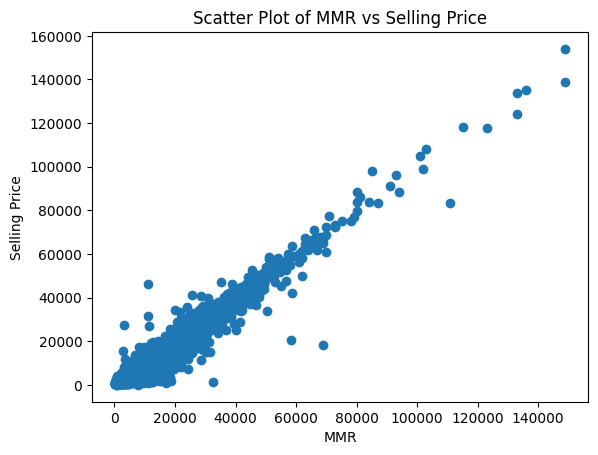

In [109]:
plt.scatter(dataset['mmr'], dataset['sellingprice'])
plt.title('Scatter Plot of MMR vs Selling Price')
plt.xlabel('MMR')
plt.ylabel('Selling Price')
plt.show()


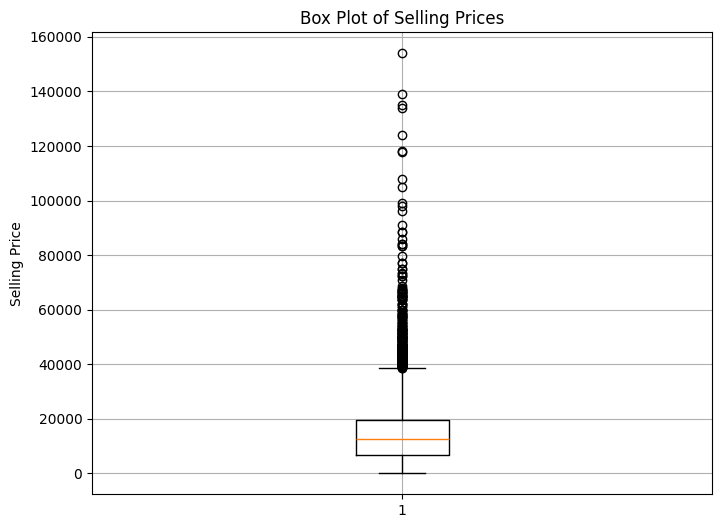

In [93]:
selling_prices = dataset['sellingprice']

plt.figure(figsize=(8, 6))
plt.boxplot(selling_prices)
plt.title('Box Plot of Selling Prices')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

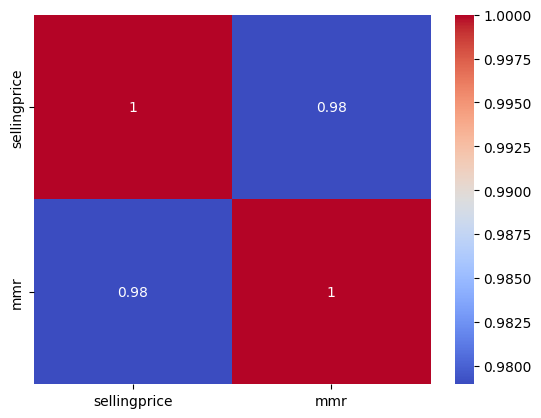

In [95]:
heatmap_data = dataset[['sellingprice', 'mmr']]

corr = heatmap_data.corr()
heatmap = sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [88]:
sorted_dataset['z_score'] = zscore(sorted_dataset['sellingprice'])

print(sorted_dataset)

      year           make             model               trim         body  \
7566  2002           Ford  F-350 Super Duty                XLT     Crew Cab   
5184  1997           ford          explorer            awd xlt          NaN   
5247  1996            BMW          3 Series              328is        Coupe   
5164  1997            NaN               NaN                NaN          NaN   
5233  1996       Chrysler           Sebring                JXi  Convertible   
...    ...            ...               ...                ...          ...   
6748  2010        Ferrari        California               Base  Convertible   
5842  2014  Mercedes-Benz           G-Class            G63 AMG          SUV   
5646  2014     Land Rover       Range Rover  Autobiography LWB          SUV   
5960  2013        Bentley   Continental GTC               Base  Convertible   
1102  2012        Ferrari        California               Base  Convertible   

     transmission                vin state  conditi

## Conclusion/summary

Typical Price: On average, cars sold for around R14422. However, this number is a bit misleading because of very cheap cars(priced at just R1).

Middle Ground: Looking at the middle price point (half the cars were more expensive, half were less), it's closer to 12500. This is a more realistic picture of what most cars cost.

Most Popular Price: The most common price tag was 15000, suggesting this might be a sweet spot for many buyers and sellers.

Price Range: Cars ranged in price from a crazy low 1 all the way up to a whopping 154000! This shows a huge difference in car prices.

Price Spread: The spread of prices is pretty big, which means some cars were very expensive while others were incredibly cheap.The variance of selling prices, approximately 124980695.05, quantifies how much the selling prices deviate from the average selling price of 14421.95. 

Price Bunching: Quartiles (Q1, Q3): The first quartile (Q1) at 6700 and the third quartile (Q3) at 19500 divide the dataset. They provide insights into the distribution of selling prices and the spread of data around the median. the R1 sale  affected  the calculation of quartiles, particularly the first quartile (Q1). Q1, which represents the 25th percentile, its pulled downwards by this low-value sale, potentially underestimating the lower end of the dataset's distribution.

Outlier Alert: The R1 sales could be considered  outliers as they are  lower than the other selling prices in the dataset. These sales  might be due to  a clearance sale, auction, or special promotion, which is why I decided to not remove it but instead include it as might be an actual sale.
